## Welcome to CS 132

In [1]:
# for QR codes use inline
%matplotlib inline
qr_setting = None
#
# for lecture use notebook
# %matplotlib notebook
# qr_setting = None
#
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import laUtilities as ut
import slideUtilities as sl
import demoUtilities as dm
import pandas as pd
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
reload(sl)
reload(ut);

"Geometric Algorithms"

aka

"Linear Algebra, Geometry, and Computation"

Who am I:

Mark Crovella

Professor of Computer Science

Professor of Computing and Data Sciences

In this course we will study __linear algebra.__  

Linear algebra is an incredibly useful tool that is crucially important to a number of areas in Computer Science.  

If you study __optimization__ or __machine learning__, the starting point is linear algebra.  

If you study __computer graphics,__ the language you use every day is linear algebra.  

If you study the __performance of computer systems,__ you need linear algebra.  

If you study __algorithms__ -- especially graph algorithms and optimization algorithms -- you will absolutely need linear algebra.  

If you study __data mining,__ you will use linear algebra all the time.  

And if you study __quantum computing,__ the standard computations you use are in the language of linear algebra.

<center><img src="images/sophie-germain.jpeg" width="400px"/>
<br>
Sophie Germain</center>

>Algebra is but written geometry.
>
> Sophie Germain

$$ \hat{y} = A(A^TA)^{-1}A^T y $$

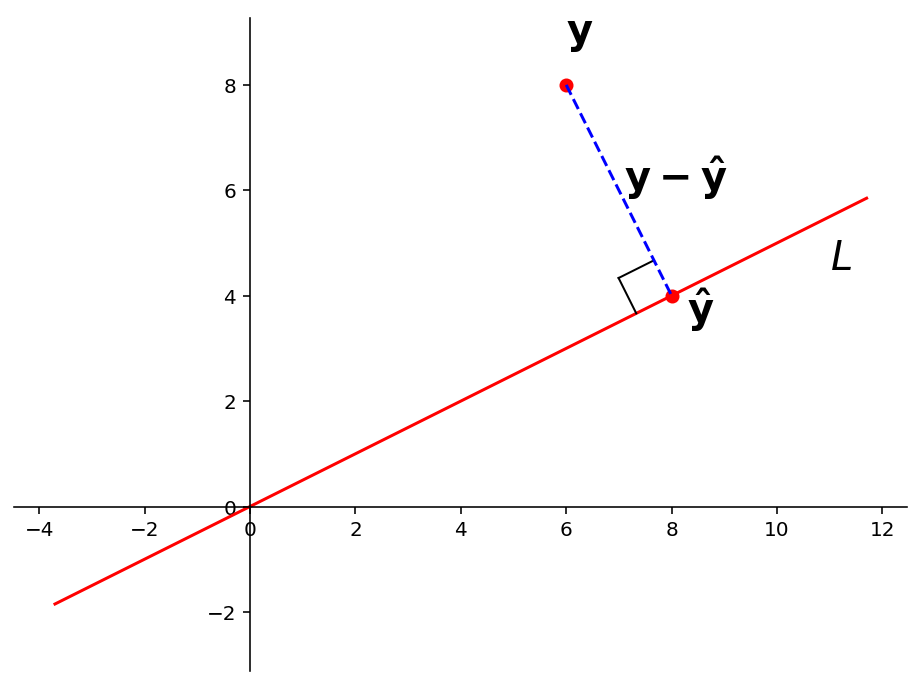

In [2]:
ax = ut.plotSetup(-3,11,-1,7,(8,6))
ut.centerAxes(ax)
plt.axis('equal')
u = np.array([4.,2])
y = np.array([6, 8])
yhat = (y.T.dot(u)/u.T.dot(u))*u
z = y-yhat
ut.plotLinEqn(1.,-2.,0.)
ut.plotVec(ax,y)
ut.plotVec(ax,yhat)
ax.text(yhat[0]+0.3,yhat[1]-0.5,r'$\mathbf{\hat{y}}$',size=20)
ax.text(y[0],y[1]+0.8,r'$\mathbf{y}$',size=20)
mm = (y + yhat)/2
ax.text(mm[0]+.1,mm[1],r'$\mathbf{y - \hat{y}}$',size=20)
ax.text(11,4.5,r'$L$',size=20)
perpline1, perpline2 = ut.perp_sym(yhat, y, np.array([0,0]), 0.75)
plt.plot(perpline1[0], perpline1[1], 'k', lw = 1)
plt.plot(perpline2[0], perpline2[1], 'k', lw = 1)
ax.plot([y[0],yhat[0]],[y[1],yhat[1]],'b--');


> Linear algebra is a fantastic subject.  On the one hand it is clean and beautiful.  If you have three vectors in 12-dimensional space, you can almost see them. [...]
> [And] It is _needed_ and _used_. [...] Linear algebra has become as basic and as applicable as calculus, and fortunately it is easier.

Gilbert Strang

> This course is potentially the most interesting and worthwhile undergraduate mathematics course you will complete.

David Lay

__The dominance of linear algebra arises because it is so fundamental,__ and in some ways, very simple.  

It deals with objects that almost always can be interpreted geometrically.  So often we can use linear algebra in a very intuitive manner -- so much so that many times it is actually the best way to think about geometric problems. 

But it is also rigorous and captures situations that sometimes we would overlook if we were proceeding purely intuitively.  This is because it is also about solving equations, and finding solutions to various kinds of problems.  So the advantage of being basic and fundamental is that it can be used and applied in so many ways.

## How We will Teach this Course

* This is a course that is teaching a mathematical subject.

* But, __crucially,__ we are also teaching you the subject from the viewpoint of __Computer Science.__

* So, we will learn the subject mathematically, that is, __rigorously.__

* However, we will always be concerned with things that pure mathematicians sometimes gloss over: 

... that much of what we want to learn is how to think about __computation.__

* As a result, there will be a significant programming component to the course, and we will discuss computational implications frequently.

<center><img src="images/L0-overview-diagram.pdf" alt="Overview" width="1000"/></center>

## Resources

Everything I am mentioning here is also presented in more detail in the syllabus (on Piazza). 

* __Text:__
    * Online Lecture notes, at https://mcrovella.github.io/CS132-Geometric-Algorithms/landing-page.html

* __Coding__
    * All code in the course is Python 3
    * You need to know Python and you will use it extensively
    * Instructions for installing python are on Piazza

* __TopHat__
    * We will be using _peer instruction_.  This requires you to answer questions during lecture, sometimes after discussion with your classmates.
    * You will be required to answers questions in class using TopHat
    * TopHat runs on your mobile device or laptop (at www.tophat.com) or by text message.
    * You need a subscription: $30 (semester)
    * TopHat provides personal support (via support@tophat.com, the in-app support button, or by calling 1-888-663-5491)
    * You should have received an email invite
    * If you didn't, register using the join code 794726.

* __Piazza__ 
    * For online discussion -- very important!
    * Distribution of homework assignments and solutions.
    * You should have received an email invite
    * If you didn't, go to piazza.com/bu/spring2023/cs132 and register yourself

* __Gradescope__
    * Assignments are submitted and returned to you via Gradescope (www.gradescope.com)
    * You should have received an email invite.
    * You will need to upload both PDFs and code 
    * You can prepare your written submission via:
        * Handwritten -- be careful, if the grader cannot read, you will lose points!
        * Word with equation editor
        * Latex -- the best approach - instructions are in the syllabus
    * Instructions for uploading are on Piazza

* __Lecture slides:__ All slides will be made available online.
    * https://github.com/mcrovella/CS132-Geometric-Algorithms
    * Slides are _python notebooks_ -- they include excutable code.

* __DiagramAR__
    * Many figures presented in lecture are actually 3D
    * We have developed an app to help you visualize these 3D figures
    * It is called DiagramAR
        * Google Play Link: https://play.google.com/store/apps/details?id=com.crovella.diagramar
        * App Store Link: https://apps.apple.com/us/app/diagramar/id1484987191.
    * Within the app, select the course, the lecture, and the figure number to see the figure in augmented reality (AR)

### DiagramAR Demo

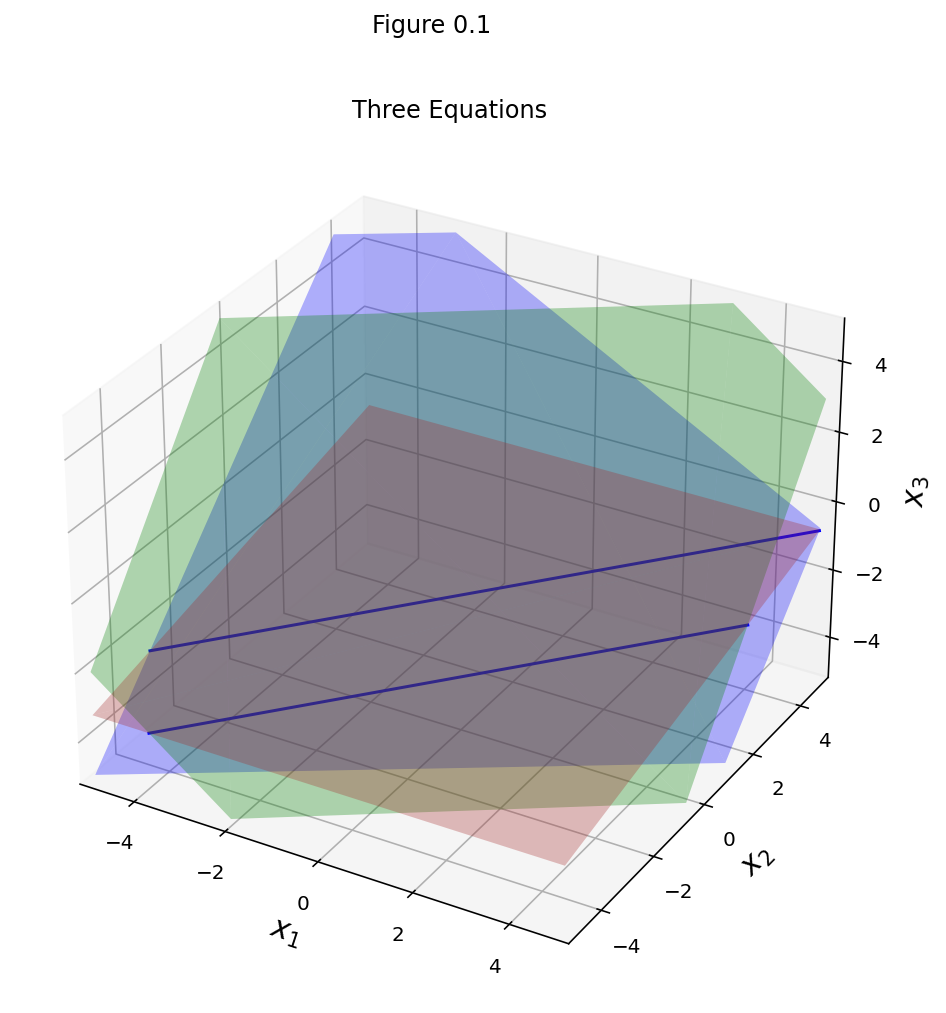

In [3]:
fig_num = (0, 1)
eq1 = [0,  1, -4,  8]
eq2 = [2, -3,  2,  1]
eq3 = [5, -8,  7,-20]
fig = ut.three_d_figure(fig_num, fig_desc = 'Three Equations',
                        xmin = -5, xmax = 5, ymin = -5, ymax = 5, zmin = -5, zmax = 5, 
                        figsize = (10, 8), qr = qr_setting)
fig.plotLinEqn(eq1, 'Brown')
fig.plotLinEqn(eq2, 'Green')
fig.plotLinEqn(eq3, 'Blue')
fig.plotIntersection(eq1, eq2, color='Blue')
fig.plotIntersection(eq1, eq3, color='Blue')
fig.set_title('Three Equations')
fig.save()

## Staff

### Teaching Fellows

* Daniel Scrivener
* Nick Hall
* Ciaran Ueda Fitzgerald
* Paul Kim
    * Email addresses in Syllabus
    * Office Hours Location: in Calendar
    * Office Hours: in Calendar


### Course Assistants

* Sakshi Shah 
* Esther Choi 
* Natalia Clark 
* Reshab Chhabra 
* Nada Abdelwahab 
* Jincheng Zhang 
* Jason Wong 
* Hou Chi Chan 

All TFs and CAs will hold office hours.  There will be more than 25+ office hours per week available to you.

## How the Course is Structured

* Two lectures a week: Tuesday and Thursday
* Discussion section on Monday
* Homework assigned on Thursday, due on the following Thursday at 9am
* Schedule of Lectures and Homeworks are in the syllabus (on Piazza)

## Grading

Homeworks will be submitted via `gradescope`.  

__NOTE: (IMPORTANT)__ Late homeworks will not be accepted.  However your final grade will be based on the top 10 homeworks submitted (out of 12).

Final grades will be computed based on the following:

   * __50% Homework assignments.__ The top 10 homework grades (out of the 12 assigned) will be used to compute this score
   * __10% Participation via Tophat__
   * __15% Midterm__
   * __25% Final__ (Cumulative)

## Academic Honesty

You may discuss homework assignments with classmates, but you are 
solely responsible for what you turn in. Collaboration in the form of
discussion is allowed, but all forms of cheating (copying parts of a
classmate's assignment, plagiarism from books or old posted solutions)
are NOT allowed.

I have brought students before the Academic Conduct Committee in the past.  It's not pleasant.   Students have been suspended or have voluntarily left in the past.  Let's not do that.